In [3]:
# Paths
edge_output_folder = os.path.join(extracted_folder, "edge_detected_images")

# Step 4: Canny Edge Detection Algorithm
def canny_edge_detection(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Calculate Gradients
    grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    gradient_direction = cv2.phase(grad_x, grad_y, angleInDegrees=True)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred_image, 100, 200)

    # Visualize Results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

# Step 5: Batch Process Images for Canny Edge Detection
def batch_process_canny(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Apply Canny Edge Detection
            image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)
            cv2.imwrite(output_path, edges)

    print(f"Canny edge-detected images saved to: {output_folder}")

# Step 6: Visualize Original vs Edge-Detected Images
def visualize_results(original_folder, edge_folder, num_images=5):
    original_images = sorted(os.listdir(original_folder))[:num_images]
    edge_images = sorted(os.listdir(edge_folder))[:num_images]

    plt.figure(figsize=(15, 10))
    for i, (orig_file, edge_file) in enumerate(zip(original_images, edge_images)):
        orig_path = os.path.join(original_folder, orig_file)
        edge_path = os.path.join(edge_folder, edge_file)

        original = cv2.imread(orig_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original Image {i + 1}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Edge-Detected Image {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run Edge Detection and Visualization
batch_process_canny(preprocessed_folder, edge_output_folder)
visualize_results(preprocessed_folder, edge_output_folder)


KeyboardInterrupt: 

Subset of 50 images created in: C:\Users\srava\Downloads\natural_images_dataset\preprocessed_images\subset
Canny edge-detected images saved to: C:\Users\srava\Downloads\natural_images_dataset\edge_detected_images_subset


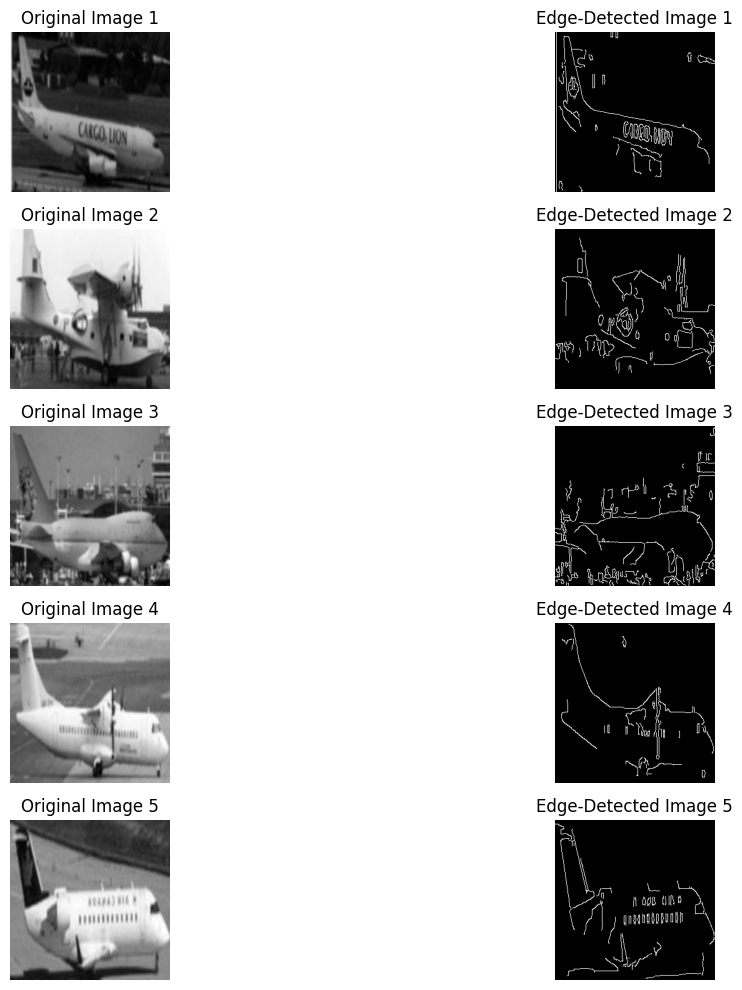

In [5]:
import random

# Paths
subset_folder = os.path.join(preprocessed_folder, "subset")
edge_output_folder = os.path.join(extracted_folder, "edge_detected_images_subset")

# Step 1: Create a Subset of Images
def create_subset(input_folder, output_folder, subset_size=50):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    all_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    subset_files = random.sample(all_files, min(len(all_files), subset_size))

    for filename in subset_files:
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cv2.imread(input_path))

    print(f"Subset of {len(subset_files)} images created in: {output_folder}")

# Step 2: Batch Process Subset for Canny Edge Detection
def batch_process_canny(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Apply Canny Edge Detection
            image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)
            cv2.imwrite(output_path, edges)

    print(f"Canny edge-detected images saved to: {output_folder}")

# Step 3: Visualize Subset Results
def visualize_results(original_folder, edge_folder, num_images=5):
    original_images = sorted(os.listdir(original_folder))[:num_images]
    edge_images = sorted(os.listdir(edge_folder))[:num_images]

    plt.figure(figsize=(15, 10))
    for i, (orig_file, edge_file) in enumerate(zip(original_images, edge_images)):
        orig_path = os.path.join(original_folder, orig_file)
        edge_path = os.path.join(edge_folder, edge_file)

        original = cv2.imread(orig_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.imread(edge_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original Image {i + 1}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Edge-Detected Image {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run Subset Processing and Visualization
subset_size = 50  # Adjust the size of the subset
create_subset(preprocessed_folder, subset_folder, subset_size)
batch_process_canny(subset_folder, edge_output_folder)
visualize_results(subset_folder, edge_output_folder)


Dynamic Canny edge-detected images saved to: C:\Users\srava\Downloads\natural_images_dataset\edge_detected_images_subset


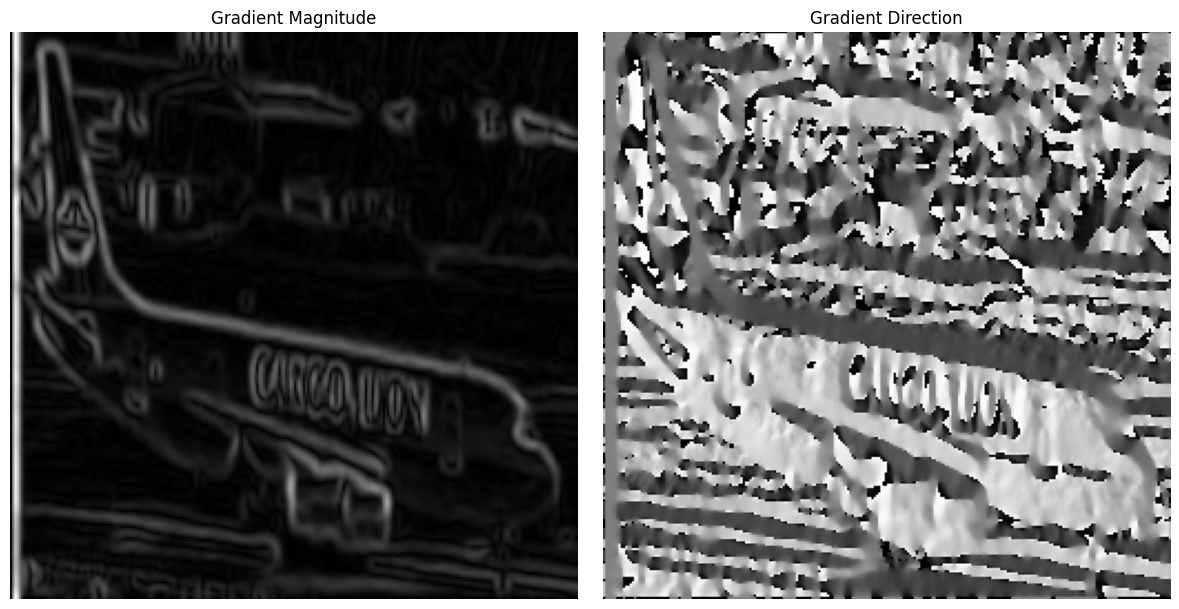

In [7]:
def dynamic_canny_edge_detection(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Calculate Dynamic Thresholds
    lower_thresh = int(blurred_image.mean() * 0.5)
    upper_thresh = int(blurred_image.mean() * 1.5)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred_image, lower_thresh, upper_thresh)
    cv2.imwrite(output_path, edges)

    return edges

# Process Subset with Dynamic Thresholds
def batch_process_canny_dynamic(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            dynamic_canny_edge_detection(input_path, output_path)

    print(f"Dynamic Canny edge-detected images saved to: {output_folder}")

# Visualize Results with Gradient Magnitude and Direction
def visualize_gradients(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Calculate Gradients
    grad_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    gradient_direction = cv2.phase(grad_x, grad_y, angleInDegrees=True)

    # Visualize
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradient_direction, cmap='gray')
    plt.title("Gradient Direction")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Run the Enhanced Processing
batch_process_canny_dynamic(subset_folder, edge_output_folder)
visualize_gradients(os.path.join(subset_folder, os.listdir(subset_folder)[0]))


In [11]:
def compare_edge_detection(image_path):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Sobel Filter
    sobel_edges = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Prewitt Filter (approximate using Sobel with smaller kernel)
    prewitt_x = cv2.filter2D(blurred_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(blurred_image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_edges = prewitt_x + prewitt_y

    # Laplacian of Gaussian (LoG)
    log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Canny Edge Detection
    canny_edges = cv2.Canny(blurred_image, 100, 200)

    # Visualize the comparisons
    plt.figure(figsize=(15, 10))
    methods = [blurred_image, sobel_edges, prewitt_edges, log_edges, canny_edges]
    titles = ["Original (Blurred)", "Sobel Filter", "Prewitt Filter", "Laplacian of Gaussian (LoG)", "Canny Edge Detection"]

    for i, (method, title) in enumerate(zip(methods, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(method, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


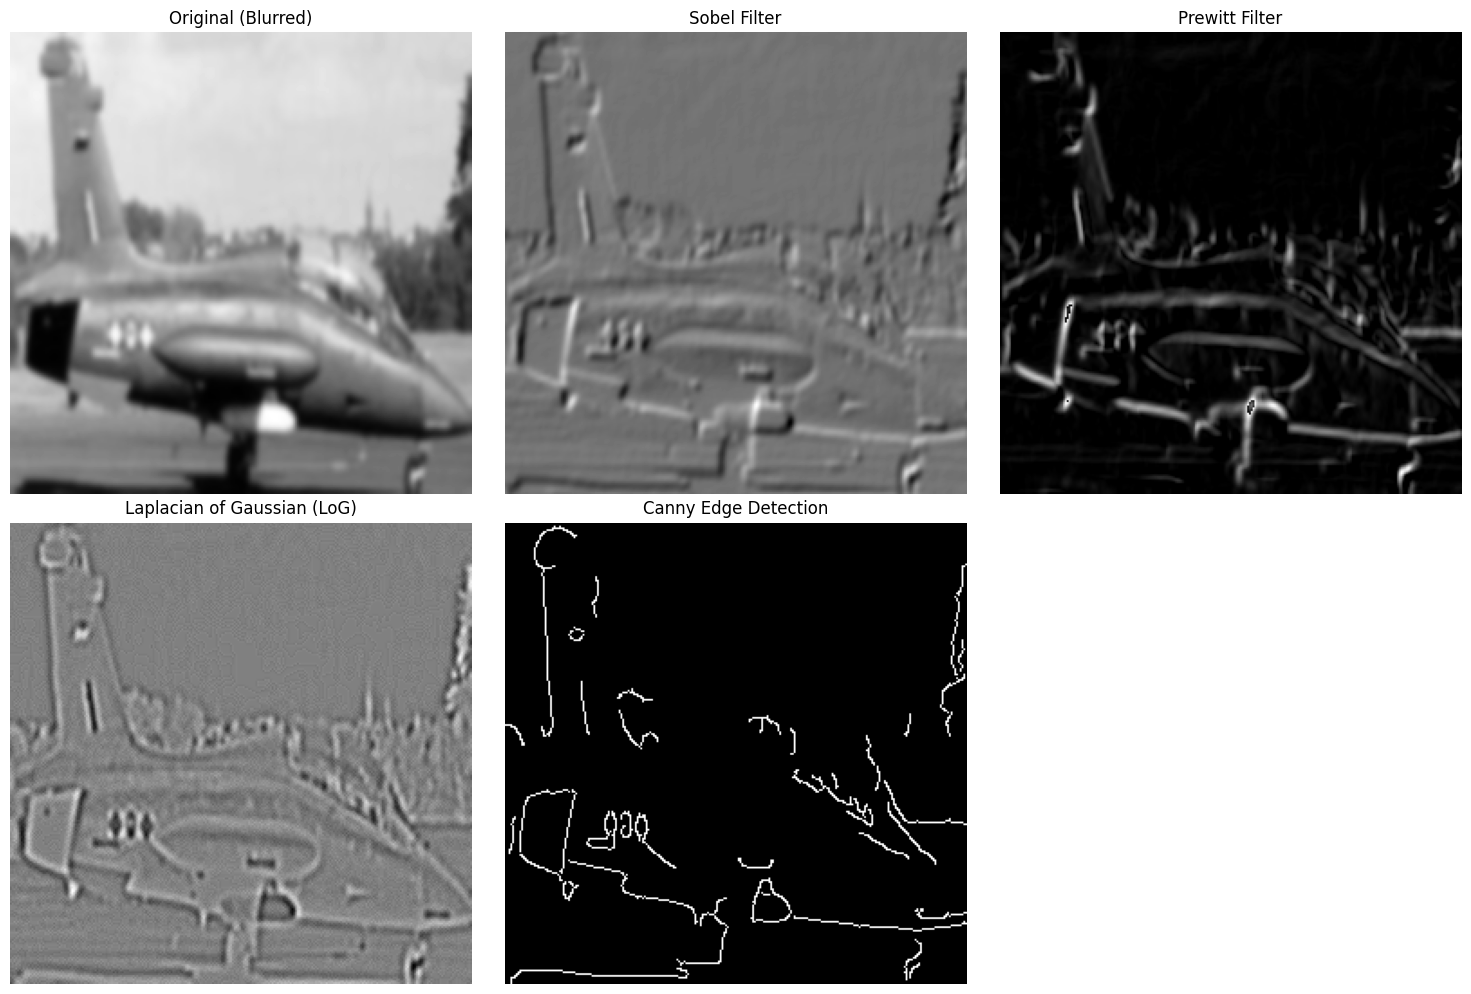

In [13]:
compare_edge_detection(os.path.join(preprocessed_folder, os.listdir(preprocessed_folder)[0]))


In [15]:
def evaluate_edge_detection(image_path, edges):
    # Read the original image
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge Pixel Density
    edge_density = np.sum(edges > 0) / edges.size

    # Mean Gradient Magnitude
    grad_x = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    mean_gradient_magnitude = np.mean(gradient_magnitude)

    return edge_density, mean_gradient_magnitude

# Example Usage
edges = cv2.Canny(cv2.imread(os.path.join(preprocessed_folder, os.listdir(preprocessed_folder)[0]), cv2.IMREAD_GRAYSCALE), 100, 200)
edge_density, mean_grad_mag = evaluate_edge_detection(os.path.join(preprocessed_folder, os.listdir(preprocessed_folder)[0]), edges)
print(f"Edge Density: {edge_density:.4f}")
print(f"Mean Gradient Magnitude: {mean_grad_mag:.4f}")


Edge Density: 0.0403
Mean Gradient Magnitude: 43.2911


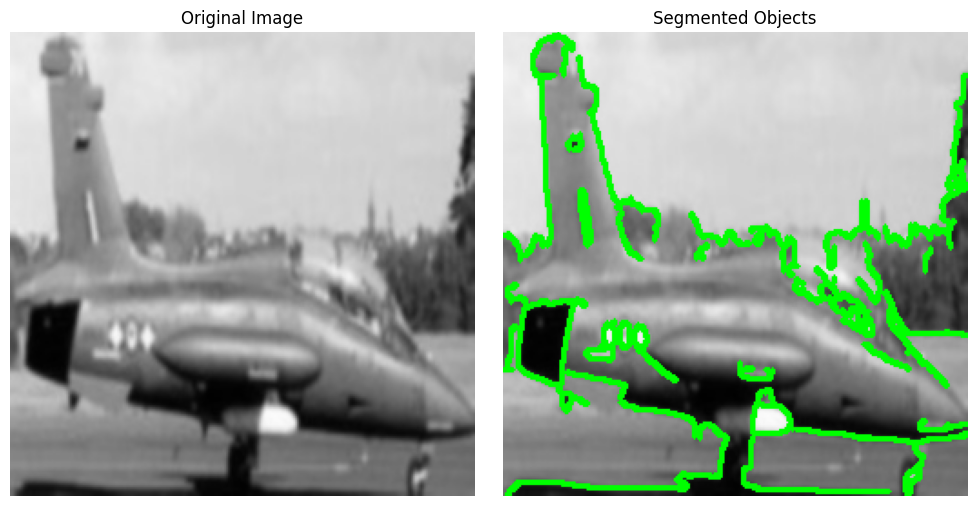

In [17]:
def segment_objects(image_path):
    # Read image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Canny Edge Detection
    edges = cv2.Canny(gray_image, 100, 200)

    # Find Contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw Contours
    segmented_image = image.copy()
    cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)

    # Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Objects")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example Usage
segment_objects(os.path.join(preprocessed_folder, os.listdir(preprocessed_folder)[0]))


In [19]:
import csv

def save_evaluation_metrics(folder, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Image Name", "Edge Density", "Mean Gradient Magnitude"])

        for filename in os.listdir(folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_path = os.path.join(folder, filename)
                edges = cv2.Canny(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), 100, 200)
                edge_density, mean_grad_mag = evaluate_edge_detection(image_path, edges)
                writer.writerow([filename, edge_density, mean_grad_mag])

    print(f"Evaluation metrics saved to: {output_csv}")

# Example Usage
save_evaluation_metrics(preprocessed_folder, "evaluation_metrics.csv")


Evaluation metrics saved to: evaluation_metrics.csv


In [21]:
def print_evaluation_metrics(folder):
    print("{:<20} {:<15} {:<20}".format("Image Name", "Edge Density", "Mean Gradient Magnitude"))
    print("-" * 60)

    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image_path = os.path.join(folder, filename)
            edges = cv2.Canny(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), 100, 200)
            edge_density, mean_grad_mag = evaluate_edge_detection(image_path, edges)
            print("{:<20} {:<15.4f} {:<20.4f}".format(filename, edge_density, mean_grad_mag))

# Example Usage
print_evaluation_metrics(preprocessed_folder)


Image Name           Edge Density    Mean Gradient Magnitude
------------------------------------------------------------
airplane_0000.jpg    0.0403          43.2911             
airplane_0001.jpg    0.0388          44.5143             
airplane_0002.jpg    0.0497          46.6414             
airplane_0003.jpg    0.0454          48.3515             
airplane_0004.jpg    0.0500          45.5492             
airplane_0005.jpg    0.0569          59.3581             
airplane_0006.jpg    0.0295          35.2547             
airplane_0007.jpg    0.0644          54.8001             
airplane_0008.jpg    0.0687          62.0093             
airplane_0009.jpg    0.0412          50.0334             
airplane_0010.jpg    0.0294          38.5359             
airplane_0011.jpg    0.0548          48.8621             
airplane_0012.jpg    0.0243          30.9967             
airplane_0013.jpg    0.0304          35.3841             
airplane_0014.jpg    0.0331          34.4926             
airplane


Showcasing Results for a Subset of Images:
Image Name           Edge Density    Mean Gradient Magnitude
------------------------------------------------------------
airplane_0000.jpg    0.0403          43.2911             
airplane_0001.jpg    0.0388          44.5143             
airplane_0002.jpg    0.0497          46.6414             
airplane_0003.jpg    0.0454          48.3515             
airplane_0004.jpg    0.0500          45.5492             


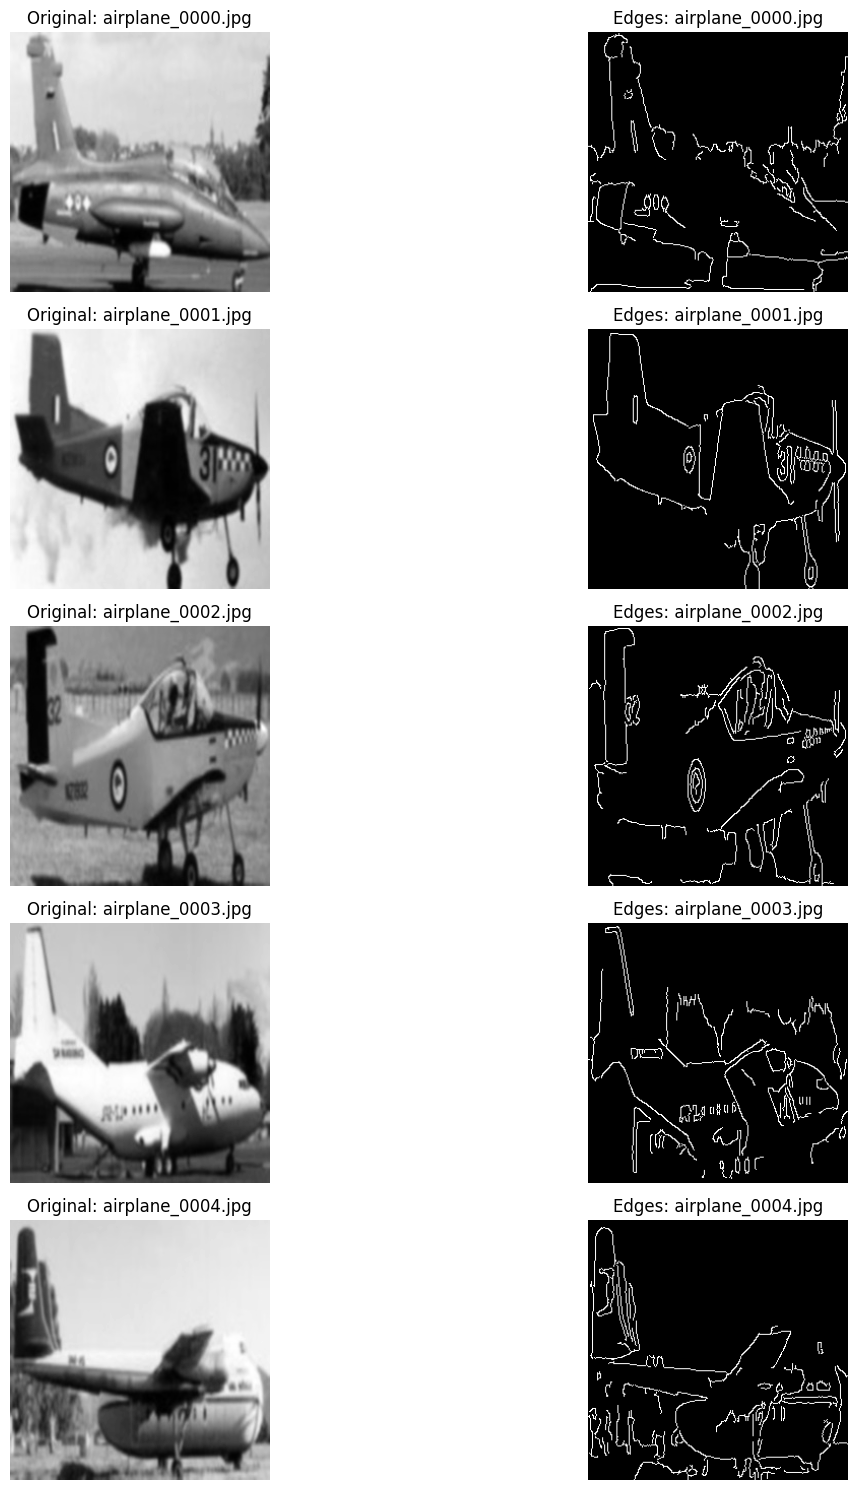


Summarizing Metrics for the Entire Dataset:
Total Images Processed: 6899
Average Edge Density: 0.0395
Average Gradient Magnitude: 43.5712

Saving Results as a PDF Report:
Results saved to: results_summary.pdf


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Evaluate Edge Detection Metrics
def evaluate_edge_detection(image_path, edges):
    # Read the original image
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge Pixel Density
    edge_density = np.sum(edges > 0) / edges.size

    # Mean Gradient Magnitude
    grad_x = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    mean_gradient_magnitude = np.mean(gradient_magnitude)

    return edge_density, mean_gradient_magnitude

# Showcase Results for a Subset of Images
def showcase_results_with_metrics(folder, num_images=5):
    print("{:<20} {:<15} {:<20}".format("Image Name", "Edge Density", "Mean Gradient Magnitude"))
    print("-" * 60)

    images = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])[:num_images]
    plt.figure(figsize=(15, num_images * 3))

    for idx, filename in enumerate(images):
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Canny Edge Detection
        edges = cv2.Canny(image, 100, 200)

        # Calculate Metrics
        edge_density, mean_grad_mag = evaluate_edge_detection(image_path, edges)
        print("{:<20} {:<15.4f} {:<20.4f}".format(filename, edge_density, mean_grad_mag))

        # Display Original and Edge-Detected Images
        plt.subplot(num_images, 2, 2 * idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2 * idx + 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Edges: {filename}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Summarize Dataset Metrics
def summarize_dataset_metrics(folder):
    total_images = 0
    total_edge_density = 0
    total_grad_mag = 0

    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image_path = os.path.join(folder, filename)
            edges = cv2.Canny(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), 100, 200)
            edge_density, mean_grad_mag = evaluate_edge_detection(image_path, edges)

            total_images += 1
            total_edge_density += edge_density
            total_grad_mag += mean_grad_mag

    # Calculate and Print Summary
    avg_edge_density = total_edge_density / total_images
    avg_grad_mag = total_grad_mag / total_images
    print(f"Total Images Processed: {total_images}")
    print(f"Average Edge Density: {avg_edge_density:.4f}")
    print(f"Average Gradient Magnitude: {avg_grad_mag:.4f}")

# Save Results as a PDF
def save_results_as_pdf(folder, pdf_path, num_images=5):
    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_path)
    images = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])[:num_images]

    for filename in images:
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.Canny(image, 100, 200)

        # Plot Original and Edges
        fig = plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Edges: {filename}")
        plt.axis('off')

        pdf.savefig(fig)
        plt.close()

    pdf.close()
    print(f"Results saved to: {pdf_path}")

# Example Usage
preprocessed_folder = r"C:\Users\srava\Downloads\natural_images_dataset\preprocessed_images"
print("\nShowcasing Results for a Subset of Images:")
showcase_results_with_metrics(preprocessed_folder, num_images=5)

print("\nSummarizing Metrics for the Entire Dataset:")
summarize_dataset_metrics(preprocessed_folder)

print("\nSaving Results as a PDF Report:")
save_results_as_pdf(preprocessed_folder, "results_summary.pdf", num_images=5)



Showcasing Segmentation Results with Metrics:
Image Name           Number of Objects Average Object Size 
------------------------------------------------------------
airplane_0000.jpg    54              334.40              
airplane_0001.jpg    46              102.50              
airplane_0002.jpg    61              186.90              
airplane_0003.jpg    68              204.75              
airplane_0004.jpg    63              54.50               


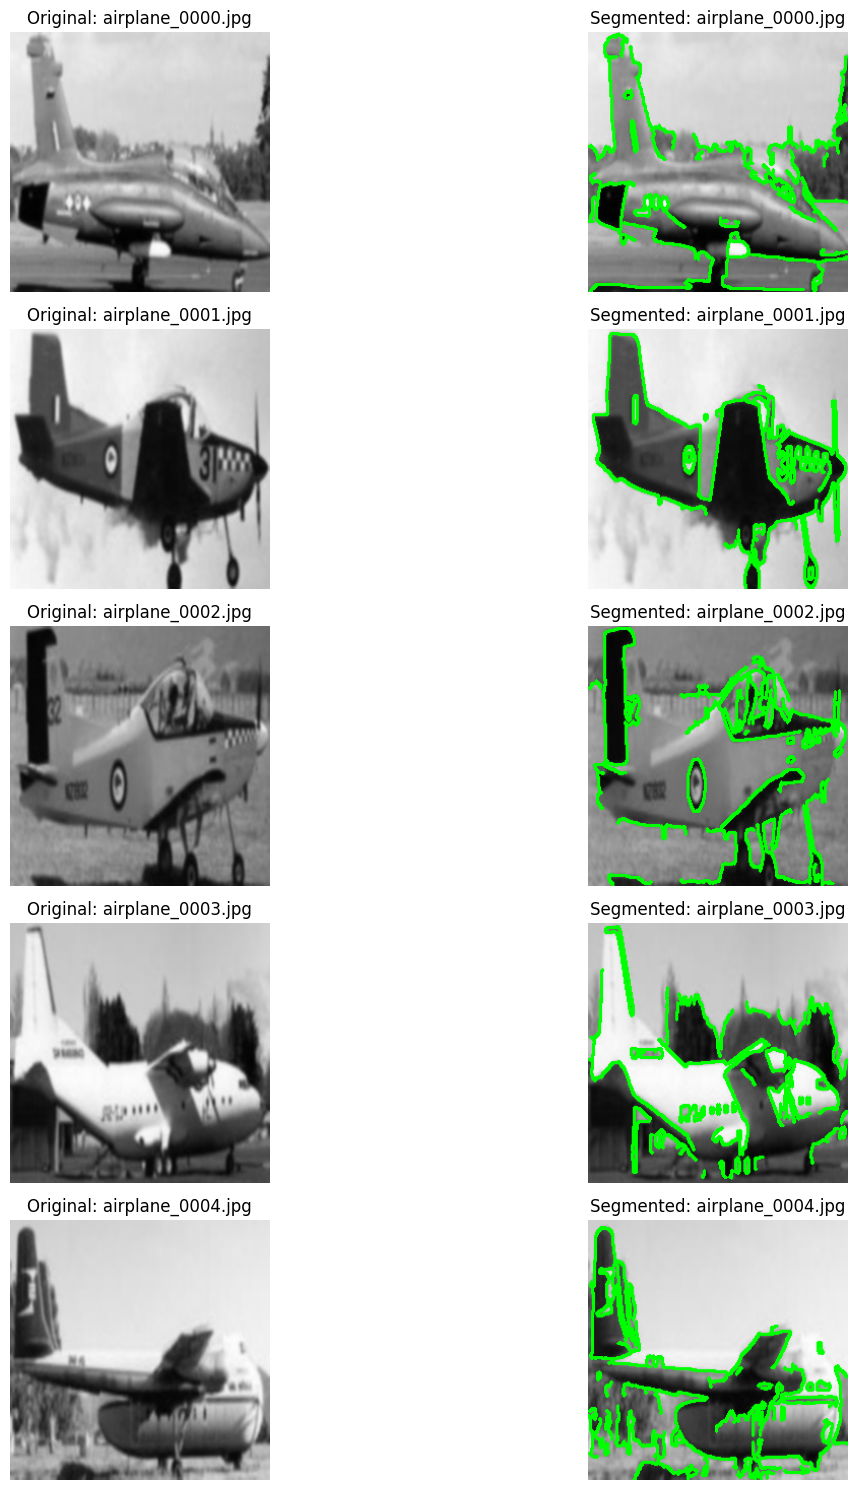


Saving Segmentation Results as a PDF Report:
Segmentation results saved to: segmentation_results.pdf


In [3]:
#Object Segmentation with Metrics
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Evaluate Edge Detection Metrics
def evaluate_edge_detection(image_path, edges):
    # Read the original image
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge Pixel Density
    edge_density = np.sum(edges > 0) / edges.size

    # Mean Gradient Magnitude
    grad_x = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    mean_gradient_magnitude = np.mean(gradient_magnitude)

    return edge_density, mean_gradient_magnitude

# Perform Object Segmentation
def segment_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Canny Edge Detection
    edges = cv2.Canny(gray_image, 100, 200)

    # Find Contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw Contours
    segmented_image = image.copy()
    cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)  # Green contours

    # Metrics: Number of Objects and Sizes
    num_objects = len(contours)
    object_sizes = [cv2.contourArea(cnt) for cnt in contours if cv2.contourArea(cnt) > 50]

    return segmented_image, num_objects, object_sizes

# Showcase Results for Segmentation
def showcase_segmentation_with_metrics(folder, num_images=5):
    print("{:<20} {:<15} {:<20}".format("Image Name", "Number of Objects", "Average Object Size"))
    print("-" * 60)

    images = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])[:num_images]
    plt.figure(figsize=(15, num_images * 3))

    for idx, filename in enumerate(images):
        image_path = os.path.join(folder, filename)

        # Segment Objects
        segmented_image, num_objects, object_sizes = segment_objects(image_path)

        # Calculate Metrics
        avg_object_size = np.mean(object_sizes) if object_sizes else 0
        print("{:<20} {:<15} {:<20.2f}".format(filename, num_objects, avg_object_size))

        # Display Original and Segmented Images
        original_image = cv2.imread(image_path)

        plt.subplot(num_images, 2, 2 * idx + 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2 * idx + 2)
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented: {filename}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Save Segmentation Results as a PDF
def save_segmentation_results_as_pdf(folder, pdf_path, num_images=5):
    pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_path)
    images = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])[:num_images]

    for filename in images:
        image_path = os.path.join(folder, filename)

        # Segment Objects
        segmented_image, num_objects, object_sizes = segment_objects(image_path)

        # Plot Original and Segmented Images
        original_image = cv2.imread(image_path)

        fig = plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Original: {filename}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented: {filename} ({num_objects} Objects)")
        plt.axis('off')

        pdf.savefig(fig)
        plt.close()

    pdf.close()
    print(f"Segmentation results saved to: {pdf_path}")

# Example Usage
preprocessed_folder = r"C:\Users\srava\Downloads\natural_images_dataset\preprocessed_images"

print("\nShowcasing Segmentation Results with Metrics:")
showcase_segmentation_with_metrics(preprocessed_folder, num_images=5)

print("\nSaving Segmentation Results as a PDF Report:")
save_segmentation_results_as_pdf(preprocessed_folder, "segmentation_results.pdf", num_images=5)
